https://www.kaggle.com/datasets/nolanbconaway/rollercoaster-tycoon-rides

In [1]:
using CSV, DataFrames

In [3]:
csv = CSV.File("rollercoasters.csv")

142-element CSV.File:
 CSV.Row: (park_id = 0, theme = String31("Barony Bridge"), rollercoaster_type = String31("Bobsleigh Coaster "), custom_design = 0, excitement = 5.49, excitement_rating = String15("High"), intensity = 5.71, intensity_rating = String15("High"), nausea = 4.86, nausea_rating = String15("Medium"), max_speed = 39, avg_speed = 12, ride_time = 63, ride_length = 1496, max_pos_gs = 2.59, max_neg_gs = -0.27, max_lateral_gs = 1.71, total_air_time = 0.0, drops = 2, highest_drop_height = 19, inversions = 0)
 CSV.Row: (park_id = 0, theme = String31("Barony Bridge"), rollercoaster_type = String31("Dinghy Slide"), custom_design = 0, excitement = 4.83, excitement_rating = String15("Medium"), intensity = 5.86, intensity_rating = String15("High"), nausea = 3.5, nausea_rating = String15("Medium"), max_speed = 37, avg_speed = 11, ride_time = 48, ride_length = 1079, max_pos_gs = 2.83, max_neg_gs = -0.48, max_lateral_gs = 2.68, total_air_time = 0.36, drops = 4, highest_drop_height = 42, 

In [4]:
df = DataFrame( csv )

Row,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
,Int64,String31,String31,Int64,Float64,String15,Float64,String15,Float64,String15,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Int64
1,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,39,12,63,1496,2.59,-0.27,1.71,0.0,2,19,0
2,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.5,Medium,37,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
3,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,31,11,70,1591,3.13,-1.7,2.15,1.44,11,22,0
4,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,47,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
5,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,34,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0
6,2,Haunted Harbour,Side-Friction Roller Coaster,0,5.68,High,6.18,High,3.6,Medium,32,10,75,1466,2.36,-0.23,2.08,1.14,8,19,0
7,2,Haunted Harbour,Wooden Roller Coaster,0,7.76,Very High,7.62,High,4.68,Medium,45,17,63,2077,3.18,-1.28,1.83,3.21,5,62,-1
8,2,Haunted Harbour,Wooden Wild Mouse,0,7.19,High,7.88,Very High,4.69,Medium,30,12,53,1246,3.08,-1.0,1.96,2.16,9,22,0
9,3,Mystic Mountain,Stand Up Roller Coaster,1,5.36,High,8.66,Very High,5.97,High,41,14,48,1358,4.03,-1.09,2.39,1.59,4,51,-1


In [5]:
names(df)

21-element Vector{String}:
 "park_id"
 "theme"
 "rollercoaster_type"
 "custom_design"
 "excitement"
 "excitement_rating"
 "intensity"
 "intensity_rating"
 "nausea"
 "nausea_rating"
 ⋮
 "ride_time"
 "ride_length"
 "max_pos_gs"
 "max_neg_gs"
 "max_lateral_gs"
 "total_air_time"
 "drops"
 "highest_drop_height"
 "inversions"

In [6]:
typeof(df)

DataFrame

In [8]:
df[:,:nausea]

142-element Vector{Float64}:
 4.86
 3.5
 4.87
 4.75
 3.81
 3.6
 4.68
 4.69
 5.97
 4.56
 ⋮
 5.66
 6.86
 3.2
 3.66
 3.79
 3.81
 5.8
 4.35
 2.76

In [34]:
k1 = kde(df[:,:nausea])

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(-0.38003168673435717:0.005832957192705771:11.560031686734357, [4.437601048332129e-6, 4.459081092270112e-6, 4.493201986949247e-6, 4.540046903700468e-6, 4.5997254193297366e-6, 4.672373690534082e-6, 4.758154660319813e-6, 4.857258294882483e-6, 4.969901852974745e-6, 5.096330185500042e-6  …  4.918434466680971e-6, 4.812334342079935e-6, 4.719479264250065e-6, 4.6396911889037135e-6, 4.572818416818253e-6, 4.518735464073553e-6, 4.477342962178749e-6, 4.448567587887059e-6, 4.43236202321215e-6, 4.42870494555582e-6])

In [29]:
using Plots, KernelDensity

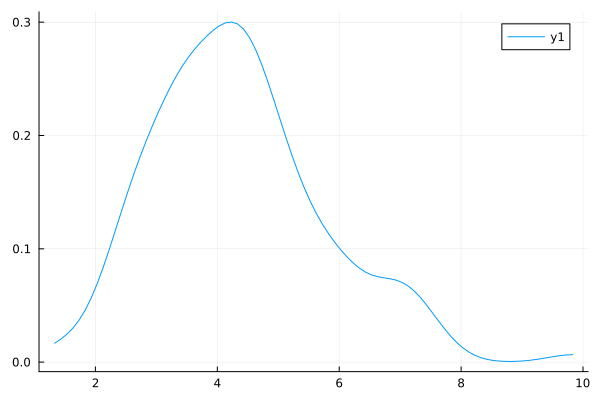

In [38]:
xrange = minimum(df[:,:nausea]):0.1:maximum(df[:,:nausea])
yvals = [ pdf(k1,x) for x in xrange ]
plot(xrange,yvals)

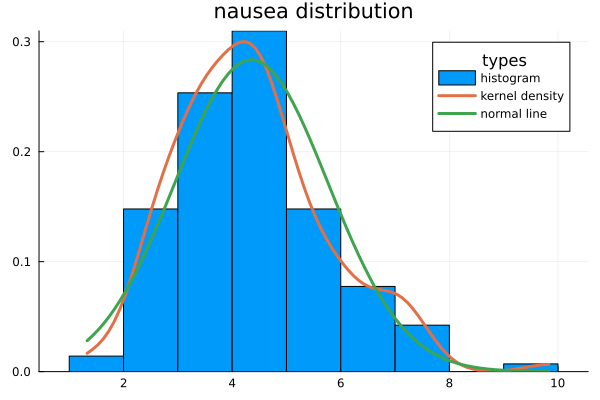

In [81]:
histogram(df[:,:nausea], legend=true, label="histogram", legendtitle="types",
                 title="nausea distribution", normalize=true )
plot!(xrange,yvals, linewidth=3, label="kernel density")
plot!(xrange, x -> pdf(nrml,x) , linewidth=3, label="normal line")

In [63]:
count( false == (ismissing.( df[:,:nausea] ) .+ 0) )

0

In [54]:
typeof(ismissing.( df[:,:nausea] ))

BitVector (alias for BitArray{1})

In [62]:
ismissing.( df[1:2,:nausea] ) .+ 0 .== 0

2-element BitVector:
 1
 1

In [66]:
using Distributions

In [71]:
nrml =Normal( mean(df[:,:nausea]), std(df[:,:nausea])   )

Normal{Float64}(μ=4.354929577464787, σ=1.4069098709854928)

In [73]:
fit( Normal, df[:,:nausea] )

Normal{Float64}(μ=4.354929577464787, σ=1.4019472104741175)

In [74]:
pdf( nrml, 5 )

0.2552667738081188

In [88]:
using HypothesisTests

In [90]:
OneSampleTTest(  df[:,:nausea] , 0 )

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          4.35493
    95% confidence interval: (4.122, 4.588)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-73

Details:
    number of observations:   142
    t-statistic:              36.88578512901936
    degrees of freedom:       141
    empirical standard error: 0.11806525365346254


In [91]:
names(df)

21-element Vector{String}:
 "park_id"
 "theme"
 "rollercoaster_type"
 "custom_design"
 "excitement"
 "excitement_rating"
 "intensity"
 "intensity_rating"
 "nausea"
 "nausea_rating"
 ⋮
 "ride_time"
 "ride_length"
 "max_pos_gs"
 "max_neg_gs"
 "max_lateral_gs"
 "total_air_time"
 "drops"
 "highest_drop_height"
 "inversions"

In [95]:
labels_tmp = unique( df[:,:excitement_rating] )
levels = 1:1:length(labels_tmp)
labels_tmp[2]

"Medium"

In [99]:
using GLM,StatsBase

In [ ]:
ols = lm(@formula( nausea ~  ), df)

Base.Meta.ParseError: ParseError:
# Error @ /home/fan/Documents/repos/JuliaLang_Yeah_Yeah_Yeah/DataScienceCaseStudies/rollercoasters/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X34sZmlsZQ==.jl:1:29
ols = lm(@formula( nausea ~ ... ), df)
#                           └─┘ ── invalid identifier

In [109]:
nbrmodel = glm(@formula(excitement_rating ~ nausea), df, NegativeBinomial(2.0), LogLink())

MethodError: MethodError: no method matching fit(::Type{GeneralizedLinearModel}, ::Matrix{Float64}, ::Matrix{Float64}, ::NegativeBinomial{Float64}, ::LogLink)
The function `fit` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  fit(!Matched::Type{D}, ::Any...) where D<:Distribution
   @ Distributions ~/.julia/packages/Distributions/fi8Qd/src/genericfit.jl:47
  fit(::Type{M}, ::AbstractMatrix{<:AbstractFloat}, !Matched::AbstractVector{<:Real}, ::UnivariateDistribution, ::Link; dropcollinear, dofit, wts, offset, fitargs...) where M<:GLM.AbstractGLM
   @ GLM ~/.julia/packages/GLM/vM20T/src/glmfit.jl:566
  fit(::Type{M}, ::AbstractMatrix, !Matched::AbstractVector, ::UnivariateDistribution, ::Link; kwargs...) where M<:GLM.AbstractGLM
   @ GLM ~/.julia/packages/GLM/vM20T/src/glmfit.jl:587
  ...


In [112]:
using GLM, RDatasets

In [113]:
quine = dataset("MASS", "quine")

Row,Eth,Sex,Age,Lrn,Days
,Cat…,Cat…,Cat…,Cat…,Int32
1,A,M,F0,SL,2
2,A,M,F0,SL,11
3,A,M,F0,SL,14
4,A,M,F0,AL,5
5,A,M,F0,AL,5
6,A,M,F0,AL,13
7,A,M,F0,AL,20
8,A,M,F0,AL,22
9,A,M,F1,SL,6


In [115]:
nbrmodel = glm(@formula(Days ~ Eth+Age), quine, NegativeBinomial(2.0), LogLink())


StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, NegativeBinomial{Float64}, LogLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Days ~ 1 + Eth + Age

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   3.03258     0.197854  15.33    <1e-52   2.64479    3.42037
Eth: N       -0.558086    0.156696  -3.56    0.0004  -0.865205  -0.250966
Age: F1      -0.379125    0.231163  -1.64    0.1010  -0.832196   0.073945
Age: F2       0.191638    0.233907   0.82    0.4126  -0.266811   0.650087
Age: F3       0.256535    0.243275   1.05    0.2917  -0.220275   0.733344
─────────────────────────────────────────────────────────────────────────

In [116]:
predict(nbrmodel, DataFrame(Age=["F0"],Eth=["A"]))

1-element Vector{Union{Missing, Float64}}:
 20.750682491628417